# Lab 06
**Class**: *CSCI 349 - Intro to Data Mining*
**Semester**: *2019 SP*
**Name**: *Mateen Qureshi*
**Instructor**: *Brian King*


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os
import math

In [2]:
data_dir = "..\data\\"
os.chdir(data_dir)

**1) [P] Create a Python function called process_FAA_hourly_data that takes a filename as a string,
and returns a completely processed pandas data frame, ready for analysis.**

In [3]:
def process_FAA_hourly_data(filename):
    df_temps = pd.read_csv(filename, skiprows=16, parse_dates=['Date/Time (GMT)'])
    df_temps.drop(labels=['Unnamed: 13'], axis=1, inplace=True)
    df_temps = df_temps[df_temps["Date/Time (GMT)"] != "Date/Time (GMT)"]
    df_temps.reset_index(drop=True, inplace=True)
    cols = df_temps.columns.drop("Date/Time (GMT)")
    df_temps[cols] = df_temps[cols].apply(pd.to_numeric, errors='coerce', axis=0)
    conversions = {np.dtype(np.int64):'unsigned',np.dtype(np.float64):'float'}
    df_temps[cols] = df_temps[cols].apply(lambda x: pd.to_numeric(x, errors='coerce', downcast=conversions[x.dtype]), axis=0)
    df_temps.index = pd.DatetimeIndex(df_temps['Date/Time (GMT)'])
    df_temps.drop(labels=['Date/Time (GMT)'], axis=1, inplace=True)
    return df_temps

**2) [P] Use your new function to read in the KIPT data file you downloaded in the last lab. Output the results
of info() and describe() to confirm you read it in correctly.**

In [4]:
filename = "faa_hourly-KIPT_20180101-20181231.csv"
df_temps = process_FAA_hourly_data(filename)

In [5]:
df_temps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8693 entries, 2018-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 12 columns):
Number of Observations (n/a)     8693 non-null uint8
Average Temp (F)                 8687 non-null float32
Max Temp (F)                     8687 non-null float32
Min Temp (F)                     8687 non-null float32
Average Dewpoint Temp (F)        8687 non-null float32
1 Hour Precip (in)               1730 non-null float32
Max Wind Gust (mph)              1044 non-null float32
Average Relative Humidity (%)    8425 non-null float32
Average Wind Speed (mph)         8680 non-null float32
Average Station Pressure (mb)    8675 non-null float32
Average Wind Direction (deg)     8279 non-null float32
Max Wind Speed (mph)             8680 non-null float32
dtypes: float32(11), uint8(1)
memory usage: 449.9 KB


In [6]:
df_temps.describe()

,Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph)
count,8693.000000,8687.000000,8687.000000,8687.000000,8687.000000,1730.000000,1044.000000,8425.000000,8680.000000,8675.000000,8279.000000,8680.000000
mean,1.399747,51.752987,51.847435,51.662914,41.679428,0.040006,23.856617,71.532364,6.033965,1017.902222,153.428192,6.325367
std,0.903277,19.336796,19.362728,19.315928,20.122921,0.088109,5.003509,19.806757,5.022885,7.417259,123.157219,5.109391
min,1.000000,-2.900000,-2.900000,-2.900000,-11.000000,0.000000,16.100000,9.000000,0.000000,986.000000,0.000000,0.000000
25%,1.000000,36.000000,36.000000,36.000000,25.000000,0.000000,20.700001,57.000000,1.750000,1013.200012,2.085000,3.500000
50%,1.000000,51.099998,51.099998,50.000000,42.099998,0.010000,23.000000,75.000000,5.800000,1017.900024,133.330002,5.800000
75%,1.000000,69.099998,69.099998,69.099998,60.099998,0.040000,26.500000,89.000000,9.200000,1022.400024,270.000000,9.200000
max,8.000000,96.099998,96.099998,96.099998,76.449997,1.480000,54.099998,100.000000,35.700001,1043.699951,360.000000,36.799999


**3) [P] Read in the file FAA_PA_stations.csv provided on Moodle. It's not actually a comma separated
file, but a tab separated file. Store the data frame as stations.**

In [7]:
stations = pd.read_csv("FAA_PA_stations.csv", sep='\t')

**4) [P] Examine the data frame (show the first few records). In particular, pay close attention to the variables
Lat and Lon. These represent the precise latitude and longitude geolocation for the weather station.
Then, create a new variable in stations that stores the distance of every station in PA to Williamsport
(KIPT). Use a standard Euclidean distance calculation (over latitude and longitude) to compute the
distance between the stations.**

In [8]:
stations.head()

,ID,Name,County,State,Lat,Lon,Elevation (feet)
0,KABE,ALLENTOWN,LEHIGH,PA,40.65,-75.44,376.0
1,KAOO,ALTOONA,BLAIR,PA,40.29,-78.32,1504.0
2,KBVI,BEAVER FALLS,BEAVER,PA,40.77,-80.39,1230.0
3,KBFD,BRADFORD,MCKEAN,PA,41.80,-78.64,2142.0
4,KBTP,BUTLER,BUTLER,PA,40.77,-79.95,1250.0


In [9]:
kipt_x = stations.loc[stations["ID"]=="KIPT"]["Lat"]
kipt_y = stations.loc[stations["ID"]=="KIPT"]["Lon"]

In [10]:
def euclidean_dist(series, x, y):
    return math.sqrt((series["Lat"] - x)**2 + (series["Lon"] - y)**2)

stations["Distance from KIPT"] = stations.apply(euclidean_dist, axis=1, args=(kipt_x, kipt_y))

In [11]:
stations.head()

,ID,Name,County,State,Lat,Lon,Elevation (feet),Distance from KIPT
0,KABE,ALLENTOWN,LEHIGH,PA,40.65,-75.44,376.0,1.593267
1,KAOO,ALTOONA,BLAIR,PA,40.29,-78.32,1504.0,1.691892
2,KBVI,BEAVER FALLS,BEAVER,PA,40.77,-80.39,1230.0,3.501685
3,KBFD,BRADFORD,MCKEAN,PA,41.80,-78.64,2142.0,1.808867
4,KBTP,BUTLER,BUTLER,PA,40.77,-79.95,1250.0,3.066235


**5) [P] Output the top 5 stations that are closest to KIPT. (The closest one should be to itself!) The stations
should be listed in order of increasing distance from KIPT.**

In [12]:
stations.sort_values("Distance from KIPT").head()

,ID,Name,County,State,Lat,Lon,Elevation (feet),Distance from KIPT
30,KIPT,WILLIAMSPORT,LYCOMING,PA,41.24,-76.92,520.0,0.000000
27,KSEG,SELINSGROVE,SNYDER,PA,40.82,-76.86,444.0,0.424264
18,KMUI,MUIR ARMY AIR FIELD,LEBANON,PA,40.43,-76.57,489.0,0.882383
28,KUNV,UNIVERSITY PARK,CENTRE,PA,40.85,-77.85,1240.0,1.008464
5,KCXY,CAPITAL CITY,YORK,PA,40.22,-76.85,340.0,1.022399


**6) [P] Using your results, go back to the PSU climate website, and download the faa_hourly data for the
same date ranges for the three closest stations to KIPT. Copy them into your data folder. Then, read in
each data file into its own data frame using your function. You should have four data frames: df_kipt,
and three other data frames representing the three closest stations.**

In [13]:
id_kipt = 'KIPT'
id_kseg = 'KSEG'
id_kmui = 'KMUI'
id_kunv = 'KUNV'
station_file = "faa_hourly-{}_20180101-20181231.csv"

df_kipt = process_FAA_hourly_data(station_file.format(id_kipt))
df_kseg = process_FAA_hourly_data(station_file.format(id_kseg))
df_kmui = process_FAA_hourly_data(station_file.format(id_kmui))
df_kunv = process_FAA_hourly_data(station_file.format(id_kunv))

station_map = {id_kipt: df_kipt, id_kseg: df_kseg, id_kmui: df_kmui, id_kunv: df_kunv}

**7) [P] Create a function called get_missing_timestamps that takes a data frame of FAA hourly data,
and returns a simple Python list of Timestamp objects representing all of the dates that are missing.
(You completed some of this functionality in the previous lab. Now you are making it a useful function.)
The design of the function is up to you. However, a forward thinking data scientist will make these
functions as flexible as possible. (AND, a good software developer will NOT hardcode values for specific
cases!)**

In [14]:
def get_missing_timestamps(dataframe):
    df_dr = pd.DatetimeIndex(pd.date_range(start=dataframe.index[0],end=dataframe.index[-1],freq='H'))
    missing = df_dr[~df_dr.isin(dataframe.index)]
    return list(missing)


**8) [P] Write the Python code that reports a list of timestamps that are included in each nearby station that
KIPT is missing. (HINT: it will be far, far easier if you consider casting your list to a set, and using set
methods.)**

In [15]:
missing_set = set(get_missing_timestamps(df_kipt))
for key in station_map:
    print("\nFor station {}, we have the following Timestamps:\n".format(key))
    print(list(missing_set.intersection(station_map[key].index)))


For station KIPT, we have the following Timestamps:

[]

For station KSEG, we have the following Timestamps:

[Timestamp('2018-03-02 19:00:00'), Timestamp('2018-09-02 22:00:00'), Timestamp('2018-08-16 11:00:00')]

For station KMUI, we have the following Timestamps:

[Timestamp('2018-03-02 19:00:00'), Timestamp('2018-01-04 13:00:00'), Timestamp('2018-09-02 22:00:00'), Timestamp('2018-05-09 04:00:00'), Timestamp('2018-05-09 06:00:00'), Timestamp('2018-04-11 03:00:00'), Timestamp('2018-06-12 07:00:00'), Timestamp('2018-08-16 19:00:00'), Timestamp('2018-04-11 04:00:00'), Timestamp('2018-01-31 07:00:00'), Timestamp('2018-12-13 09:00:00'), Timestamp('2018-05-09 05:00:00'), Timestamp('2018-08-16 04:00:00'), Timestamp('2018-09-06 22:00:00'), Timestamp('2018-05-10 04:00:00'), Timestamp('2018-12-13 11:00:00'), Timestamp('2018-05-10 05:00:00'), Timestamp('2018-08-21 05:00:00'), Timestamp('2018-10-17 04:00:00'), Timestamp('2018-06-12 21:00:00')]

For station KUNV, we have the following Timestamps

**9) [P] Since we're going to focus on average temperature, create a new data frame called df_ave_temps
that contains a the average temperature from all four stations. It should have a COMPLETE hourly date
range for its index from the specified start date to finish date (i.e. you should have 365 * 24 rows.) If the
dates are missing from the station you are copying from, then plug in a NaN value for that entry. Label
your variables accordingly. You will use these data for the remainder of this work.**

*df_dr constructs a complete hourly index for a given start and end date*

In [16]:
START_DATE = 'January 1, 2018 00:00'
END_DATE = 'December 31, 2018 23:00'
ave_temp_str = "Average Temp (F)"

df_dr = pd.date_range(start=START_DATE,end=END_DATE,freq='H', closed=None)
df_ave_temps = pd.DataFrame(index=df_dr)
for key, value in station_map.items():
    df_ave_temps[key] = value.loc[:,ave_temp_str]

In [17]:
df_ave_temps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2018-01-01 00:00:00 to 2018-12-31 23:00:00
Freq: H
Data columns (total 4 columns):
KIPT    8687 non-null float32
KSEG    8646 non-null float32
KMUI    8467 non-null float32
KUNV    8244 non-null float32
dtypes: float32(4)
memory usage: 205.3 KB


**10) [P] Report the dates that have missing data for all four stations, if any.**

In [18]:
df_ave_temps[df_ave_temps.isnull().all(axis=1)].index

DatetimeIndex(['2018-01-04 02:00:00', '2018-01-04 03:00:00',
               '2018-01-04 04:00:00', '2018-01-04 05:00:00',
               '2018-01-04 09:00:00', '2018-01-04 11:00:00',
               '2018-01-04 12:00:00', '2018-03-26 07:00:00',
               '2018-07-31 21:00:00', '2018-08-16 05:00:00',
               '2018-08-17 03:00:00', '2018-08-17 04:00:00',
               '2018-08-17 05:00:00', '2018-08-17 06:00:00',
               '2018-08-17 07:00:00', '2018-08-17 08:00:00',
               '2018-08-17 09:00:00', '2018-08-17 10:00:00',
               '2018-08-17 11:00:00', '2018-08-17 12:00:00',
               '2018-08-17 13:00:00', '2018-08-17 14:00:00',
               '2018-08-17 15:00:00', '2018-08-17 16:00:00',
               '2018-09-22 23:00:00', '2018-09-27 08:00:00',
               '2018-09-27 09:00:00', '2018-09-27 10:00:00',
               '2018-09-27 11:00:00', '2018-09-27 12:00:00',
               '2018-10-25 00:00:00', '2018-11-04 06:00:00',
               '2018-11-

**11) [P] Start by creating three separate scatter plots showing the average temperature over time for
Williamsport and each of the three closest stations you downloaded. Plot KIPT with the same color for
each plot, but use a different color for each of the close stations. Be sure to label your plots accordingly.**

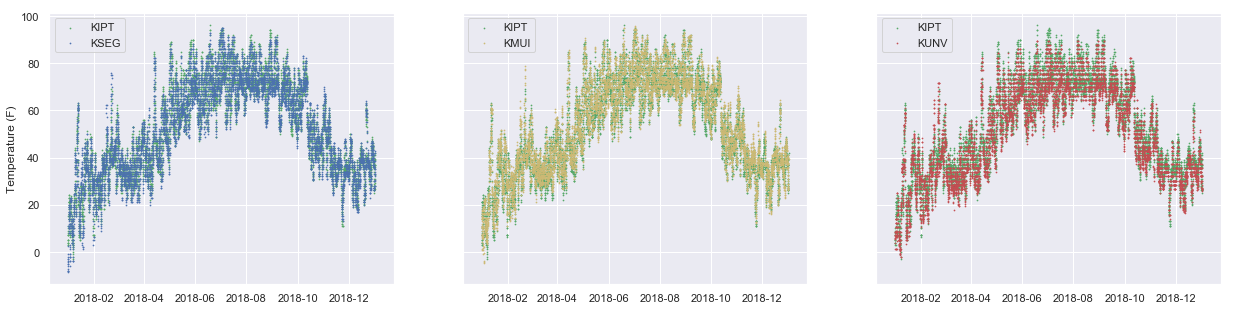

In [19]:

sns.set()

custom_palette = sns.color_palette("Paired", 9)
fig, axes = plt.subplots(1, 3, figsize=(21,5), sharex=True, sharey=True)

axes[0].scatter(df_ave_temps.index, df_ave_temps["KIPT"], s=0.5, color='g')
axes[1].scatter(df_ave_temps.index, df_ave_temps["KIPT"], s=0.5, color='g')
axes[2].scatter(df_ave_temps.index, df_ave_temps["KIPT"], s=0.5, color='g')

axes[0].scatter(df_ave_temps.index, df_ave_temps["KSEG"], s=0.5, color='b')
axes[1].scatter(df_ave_temps.index, df_ave_temps["KMUI"], s=0.5, color='y')
axes[2].scatter(df_ave_temps.index, df_ave_temps["KUNV"], s=0.5, color='r')

axes[0].set_ylabel("Temperature (F)")
for ax in axes:
    ax.legend(loc='upper left')
plt.show()


**12) [P] The lines will largely overlap, as one would expect. Select one month of your choosing, and repeat the
previous step for that month.**

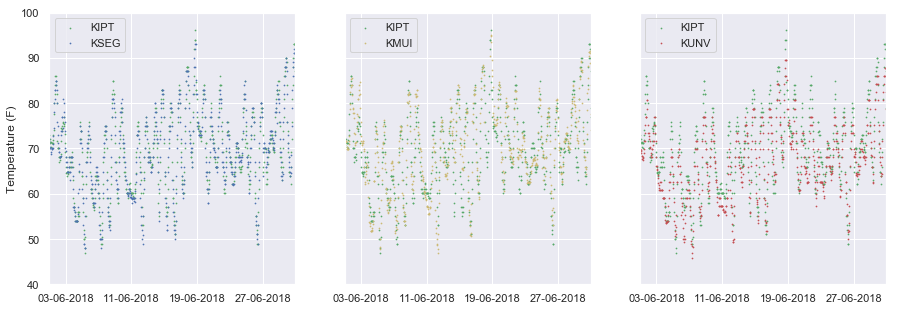

In [20]:
start = '2018-06-01 00:00'
end = '2018-06-30 23:00'

sns.set()

custom_palette = sns.color_palette("Paired", 9)
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharex=True, sharey=True)

axes[0].scatter(df_ave_temps.index, df_ave_temps["KIPT"], s=0.5, color='g')
axes[1].scatter(df_ave_temps.index, df_ave_temps["KIPT"], s=0.5, color='g')
axes[2].scatter(df_ave_temps.index, df_ave_temps["KIPT"], s=0.5, color='g')

axes[0].scatter(df_ave_temps.index, df_ave_temps["KSEG"], s=0.5, color='b')
axes[1].scatter(df_ave_temps.index, df_ave_temps["KMUI"], s=0.5, color='y')
axes[2].scatter(df_ave_temps.index, df_ave_temps["KUNV"], s=0.5, color='r')

axes[0].xaxis.set_major_locator(mdates.DayLocator(interval=8))
# set formatter
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

axes[0].set_ylabel("Temperature (F)")
axes[0].set_xlim(pd.Timestamp(start), pd.Timestamp(end))
axes[0].set_ylim(40, 100)
axes[0].set
for ax in axes:
    ax.legend(loc='upper left')
plt.show()

**13) [P] Report the number of NaN values that are shared between KIPT and each station you downloaded for
average temperature. Remember, be careful how you compare values. Dates will not be in the same row
index due to missing data (i.e. do not just iterate over rows using integers!) Write the code to generate
the answer. Because you are focused on cleaning up average temperature, this could help you decide
which station to use.**

In [21]:
df_ave_temps.loc[:,'KIPT']

2018-01-01 00:00:00    10.000000
2018-01-01 01:00:00     8.100000
2018-01-01 02:00:00     7.000000
2018-01-01 03:00:00     3.900000
2018-01-01 04:00:00     9.000000
2018-01-01 05:00:00     7.000000
2018-01-01 06:00:00     3.900000
2018-01-01 07:00:00     3.900000
2018-01-01 08:00:00     5.000000
2018-01-01 09:00:00     5.000000
2018-01-01 10:00:00     5.000000
2018-01-01 11:00:00     3.000000
2018-01-01 12:00:00     3.000000
2018-01-01 13:00:00     7.000000
2018-01-01 14:00:00    10.900000
2018-01-01 15:00:00    15.100000
2018-01-01 16:00:00    18.000000
2018-01-01 17:00:00    21.000000
2018-01-01 18:00:00    21.000000
2018-01-01 19:00:00    21.000000
2018-01-01 20:00:00    21.000000
2018-01-01 21:00:00    21.000000
2018-01-01 22:00:00    19.900000
2018-01-01 23:00:00    19.000000
2018-01-02 00:00:00    17.100000
2018-01-02 01:00:00    16.000000
2018-01-02 02:00:00    16.000000
2018-01-02 03:00:00    15.100000
2018-01-02 04:00:00    14.000000
2018-01-02 05:00:00    14.000000
          

In [22]:
benchmark = 'KIPT'
compares = ['KSEG', 'KMUI', 'KUNV']

nans = df_ave_temps.isnull()
for c in compares:
    both_nans = (nans[benchmark] == True) & (nans[c] == True)
    print('The number of similar NaN values between {} and {} is {}\n'.format(benchmark, c, len(both_nans[both_nans == True])))

The number of similar NaN values between KIPT and KSEG is 64

The number of similar NaN values between KIPT and KMUI is 47

The number of similar NaN values between KIPT and KUNV is 48



**14) [P] Perhaps it's more important to select the station that has the most similar values. Write a function
called compare_station that takes two Series objects, and computes the sum of the absolute
value of the difference between each number in the vector. You should only sum the values that have
valid values for both entries. Return the average of these absolute differences. Then, call
compare_station on KIPT and each of the new station, but pass only the average temp vector from
each station.**

In [23]:
def compare_station(series_1, series_2):
    new_series = series_1 - series_2
    result = new_series.abs().sum()/new_series.size
    return result

for c in compares:
    result = round(compare_station(df_ave_temps.loc[:, benchmark], df_ave_temps.loc[:, c]), 3)
    print("Averaged, summed, absolute difference between {} and {} is {}".format(benchmark, c, result))

Averaged, summed, absolute difference between KIPT and KSEG is 1.856
Averaged, summed, absolute difference between KIPT and KMUI is 2.654
Averaged, summed, absolute difference between KIPT and KUNV is 2.8


**15) [P] As we learned in class, you could compute a correlation coefficient between columns of data to
determine similarity. Compute the correlation coefficient between the average temp of KIPT, and each of
the other stations you downloaded. They should all be very close to 1, but not quite. What does this
technique suggest which station is most similar?**

In [24]:
df_ave_temps.corr(method='pearson')

,KIPT,KSEG,KMUI,KUNV
KIPT,1.000000,0.989221,0.982717,0.983036
KSEG,0.989221,1.000000,0.986466,0.977706
KMUI,0.982717,0.986466,1.000000,0.974392
KUNV,0.983036,0.977706,0.974392,1.000000


This technique suggests KSEG is the most similar to KIPT

**16) [M] Important question: Which station seems to be the best representative for KIPT? Why?**

KSEG seems to be the best representative for KIPT, and this can be observed from 3 things: they share the most NA values, they produce the lowest result from the compare_stations method, and they have highest correlation.

**17) [P] Create a new attribute called aveTempFixed in your KIPT data frame that keeps all of the original
average temp data, but takes the readings from the closest station to replace in the NA values.**

In [25]:
df_kipt['aveTempFixed'] = df_kipt['Average Temp (F)']
df_kipt['aveTempFixed'].fillna(df_kseg['Average Temp (F)'], inplace=True)

**18) [P] How many missing values did you fill in?**

In [26]:
kipt_nulls = df_kipt.isnull().sum(axis=0)
kipt_nulls['Average Temp (F)'] - kipt_nulls['aveTempFixed']

6

**19) [P] Create a new function called moving_ave that takes a Series of numbers and a window size, and
returns a new vector that contains the moving average over the window size.**

In [27]:
def moving_ave(series, window_size):
    return series.rolling(window_size).mean()

**20) Use your new function to smooth out your fixed average temp data. Call moving_ave with a moving
average window size of 6, 12, and 24. Show the raw data and your three smoothed plots on one single
plot. Interpret your results.**

In [28]:
ave_6 = moving_ave(df_kipt['aveTempFixed'], 6)
ave_12 = moving_ave(df_kipt['aveTempFixed'], 12)
ave_24 = moving_ave(df_kipt['aveTempFixed'], 24)

In [29]:
ave_6.head(30)

Date/Time (GMT)
2018-01-01 00:00:00          NaN
2018-01-01 01:00:00          NaN
2018-01-01 02:00:00          NaN
2018-01-01 03:00:00          NaN
2018-01-01 04:00:00          NaN
2018-01-01 05:00:00     7.500000
2018-01-01 06:00:00     6.483333
2018-01-01 07:00:00     5.783333
2018-01-01 08:00:00     5.450000
2018-01-01 09:00:00     5.633333
2018-01-01 10:00:00     4.966667
2018-01-01 11:00:00     4.300000
2018-01-01 12:00:00     4.150000
2018-01-01 13:00:00     4.666667
2018-01-01 14:00:00     5.650000
2018-01-01 15:00:00     7.333333
2018-01-01 16:00:00     9.500000
2018-01-01 17:00:00    12.500000
2018-01-01 18:00:00    15.500000
2018-01-01 19:00:00    17.833333
2018-01-01 20:00:00    19.516667
2018-01-01 21:00:00    20.500000
2018-01-01 22:00:00    20.816667
2018-01-01 23:00:00    20.483333
2018-01-02 00:00:00    19.833333
2018-01-02 01:00:00    19.000000
2018-01-02 02:00:00    18.166667
2018-01-02 03:00:00    17.183333
2018-01-02 04:00:00    16.200000
2018-01-02 05:00:00    15.3

In [30]:
ave_12.head(30)

Date/Time (GMT)
2018-01-01 00:00:00          NaN
2018-01-01 01:00:00          NaN
2018-01-01 02:00:00          NaN
2018-01-01 03:00:00          NaN
2018-01-01 04:00:00          NaN
2018-01-01 05:00:00          NaN
2018-01-01 06:00:00          NaN
2018-01-01 07:00:00          NaN
2018-01-01 08:00:00          NaN
2018-01-01 09:00:00          NaN
2018-01-01 10:00:00          NaN
2018-01-01 11:00:00     5.900000
2018-01-01 12:00:00     5.316667
2018-01-01 13:00:00     5.225000
2018-01-01 14:00:00     5.550000
2018-01-01 15:00:00     6.483333
2018-01-01 16:00:00     7.233333
2018-01-01 17:00:00     8.400000
2018-01-01 18:00:00     9.825000
2018-01-01 19:00:00    11.250000
2018-01-01 20:00:00    12.583333
2018-01-01 21:00:00    13.916667
2018-01-01 22:00:00    15.158333
2018-01-01 23:00:00    16.491667
2018-01-02 00:00:00    17.666667
2018-01-02 01:00:00    18.416667
2018-01-02 02:00:00    18.841667
2018-01-02 03:00:00    18.841667
2018-01-02 04:00:00    18.508333
2018-01-02 05:00:00    17.9

In [31]:
ave_24.head(30)

Date/Time (GMT)
2018-01-01 00:00:00          NaN
2018-01-01 01:00:00          NaN
2018-01-01 02:00:00          NaN
2018-01-01 03:00:00          NaN
2018-01-01 04:00:00          NaN
2018-01-01 05:00:00          NaN
2018-01-01 06:00:00          NaN
2018-01-01 07:00:00          NaN
2018-01-01 08:00:00          NaN
2018-01-01 09:00:00          NaN
2018-01-01 10:00:00          NaN
2018-01-01 11:00:00          NaN
2018-01-01 12:00:00          NaN
2018-01-01 13:00:00          NaN
2018-01-01 14:00:00          NaN
2018-01-01 15:00:00          NaN
2018-01-01 16:00:00          NaN
2018-01-01 17:00:00          NaN
2018-01-01 18:00:00          NaN
2018-01-01 19:00:00          NaN
2018-01-01 20:00:00          NaN
2018-01-01 21:00:00          NaN
2018-01-01 22:00:00          NaN
2018-01-01 23:00:00    11.195833
2018-01-02 00:00:00    11.491667
2018-01-02 01:00:00    11.820833
2018-01-02 02:00:00    12.195833
2018-01-02 03:00:00    12.662500
2018-01-02 04:00:00    12.870833
2018-01-02 05:00:00    13.1

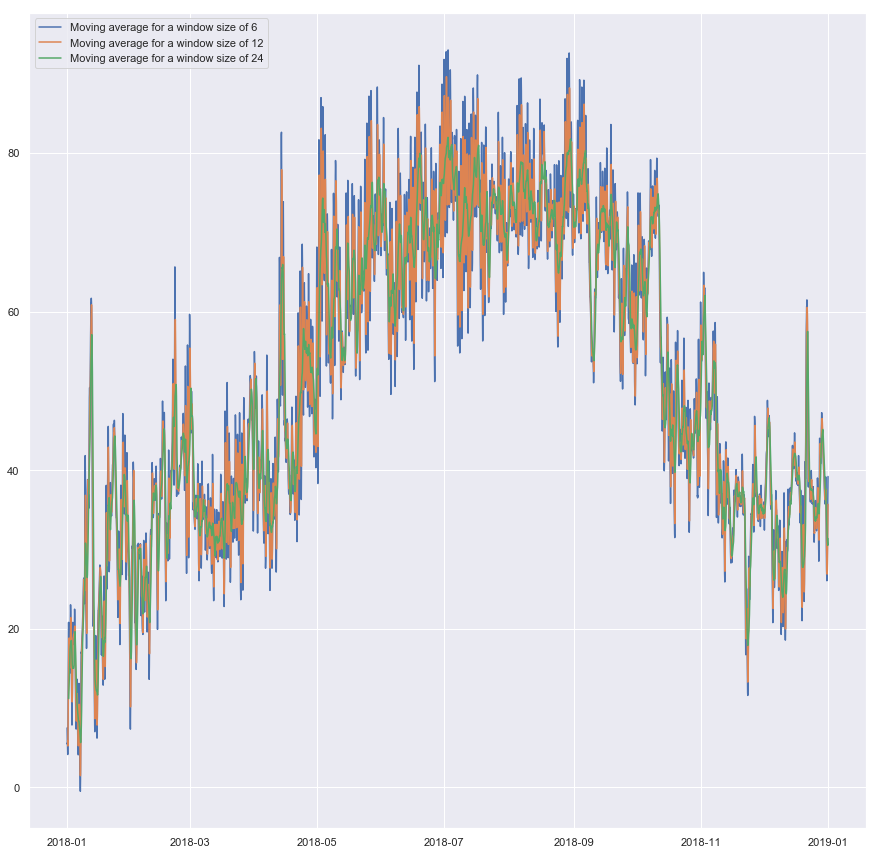

In [32]:
sns.set()
plt.figure(figsize=(15,15))
plt.plot(ave_6, label='Moving average for a window size of 6')
plt.plot(ave_12, label='Moving average for a window size of 12')
plt.plot(ave_24, label='Moving average for a window size of 24')
plt.legend(loc='upper left')
plt.show()

It can be seen that the larger the window size, the lower the variation in the raw data and so the smoother the plot is.